# Miscellaneous investigations into the stochastic Lie algebra

## Poormans symbolic Pade approximation

Using the representation of rationals as pairs of arbitrary precision integers we can effectively symbolic compute the Pade approximation of Taylor series with rational coefficients.

We will use the Polynomials packages, along with the base rational numbers, and arbitrary precision integers.

In [1]:
using Polynomials
using Gadfly

    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /home/aaron/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.DataArray, AbstractArray) at /home/aaron/.julia/v0.4/DataArrays/src/operators.jl:276.
To fix, define 
    +(DataArrays.DataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.
    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /home/aaron/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.AbstractDataArray, AbstractArray) at /home/aaron/.julia/v0.4/DataArrays/src/operators.jl:300.
To fix, define 
    +(DataArrays.AbstractDataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.


In this first study we will formulate Pade approximation the Taylor series with coefficients given by inverse of the factorial of the arithmetic progression, with $0 < a \le b$:
$$ 
\sum_{n=0}^\infty \frac{cn+d}{\left(a\cdot n+b\right)!}x^n
$$
In particular we are interested in $a=1$ and $b=2$

To compute the Pade coefficients we will use the following procedure:

1. Cast the series as rational arbitrary precision numbers
2. Then construct a polynomial
3. Finally find the rational Pade approximation

For ease of use we can turn this into a function to compute the coefficients of the Pade approximation of the inverse factorial arithmetic progression:

In [2]:
function padeprogression(n::Int64, m::Int64, a::Int64, b::Int64)
    if n < 1 || m < 1 || a < 1 || b < 0
        error("Arguments out of range")
    end
    l = n + m + 1
    u = Poly(ones(Rational{BigInt}, l))
    aB = convert(BigInt, a)
    dB = convert(BigInt, b - a)
    oB = convert(BigInt, 1)
    for k = 1:l
        dB += aB
        @inbounds u.a[k] = Rational{BigInt}(oB, factorial(dB))
    end
    Pade(u, n, m)
end

padeprogression (generic function with 1 method)

We can test the function

In [4]:
a=padeprogression(5, 5, 1, 0)

Polynomials.Pade{Rational{BigInt},Rational{BigInt}}(Poly(1//1 + 1//2x + 1//9x^2 + 1//72x^3 + 1//1008x^4 + 1//30240x^5),Poly(1//1 - 1//2x + 1//9x^2 - 1//72x^3 + 1//1008x^4 - 1//30240x^5),:x)

Compare this to the examples available online at [Wikipedia](https://en.wikipedia.org/wiki/Pad%C3%A9_approximant#Examples) and [Wolfram](http://mathworld.wolfram.com/PadeApproximant.html).

Exploring the numerator

In [5]:
a.p.a

6-element Array{Rational{BigInt},1}:
 1//1    
 1//2    
 1//9    
 1//72   
 1//1008 
 1//30240

Exploring the denominator

In [6]:
a.q.a

6-element Array{Rational{BigInt},1}:
  1//1    
 -1//2    
  1//9    
 -1//72   
  1//1008 
 -1//30240

For comparison here is the largest float, we have a little ways to go

In [8]:
[collect(62:64) [2^n - 1 for n = 62:64] [2^n for n = 62:64]]

3x3 Array{Int64,2}:
 62  4611686018427387903   4611686018427387904
 63  9223372036854775807  -9223372036854775808
 64                   -1                     0

In [13]:
c=padeprogression(13,14,1,2)

Polynomials.Pade{Rational{BigInt},Rational{BigInt}}(Poly(1//2 - 13//174x + 1//58x^2 - 11//7830x^3 + 11//75168x^4 - 11//1461600x^5 + 1//2192400x^6 - 1//64832400x^7 + 1//1728864000x^8 - 1//79873516800x^9 + 1//3594308256000x^10 - 1//295931379744000x^11 + 1//28409412455424000x^12 - 1//7244400176133120000x^13),Poly(1//1 - 14//29x + 13//116x^2 - 13//783x^3 + 11//6264x^4 - 11//78300x^5 + 11//1252800x^6 - 11//25212600x^7 + 1//57628800x^8 - 1//1815307200x^9 + 1//72612288000x^10 - 1//3793992048000x^11 + 1//273167427456000x^12 - 1//30185000733888000x^13 + 1//6761440164390912000x^14),:x)

In [14]:
[c.p.a[end].den c.q.a[end].den; 2^63 - 1 2^63 - 1 ; c.p.a[end].den - (2^63 - 1) c.q.a[end].den - (2^63 - 1)]

3x2 Array{BigInt,2}:
  7244400176133120000   6761440164390912000
  9223372036854775807   9223372036854775807
 -1978971860721655807  -2461931872463863807

Latex long table content generator

In [25]:
for i = 1:14
    s = "\$x^{$(i-1)}\$ & "
    s *= "\$\\frac{$(c.p.a[i].num)}{$(c.p.a[i].den)}\$ & "
    s *= "\$\\frac{$(c.q.a[i].num)}{$(c.q.a[i].den)}\$\\\\"
    println(s)
end
s = "\$x^{14}\$ & & "
s *= "\$\\frac{$(c.q.a[15].num)}{$(c.q.a[15].den)}\$\\\\"
println(s)

$x^{0}$ & $\frac{1}{2}$ & $\frac{1}{1}$\\
$x^{1}$ & $\frac{-13}{174}$ & $\frac{-14}{29}$\\
$x^{2}$ & $\frac{1}{58}$ & $\frac{13}{116}$\\
$x^{3}$ & $\frac{-11}{7830}$ & $\frac{-13}{783}$\\
$x^{4}$ & $\frac{11}{75168}$ & $\frac{11}{6264}$\\
$x^{5}$ & $\frac{-11}{1461600}$ & $\frac{-11}{78300}$\\
$x^{6}$ & $\frac{1}{2192400}$ & $\frac{11}{1252800}$\\
$x^{7}$ & $\frac{-1}{64832400}$ & $\frac{-11}{25212600}$\\
$x^{8}$ & $\frac{1}{1728864000}$ & $\frac{1}{57628800}$\\
$x^{9}$ & $\frac{-1}{79873516800}$ & $\frac{-1}{1815307200}$\\
$x^{10}$ & $\frac{1}{3594308256000}$ & $\frac{1}{72612288000}$\\
$x^{11}$ & $\frac{-1}{295931379744000}$ & $\frac{-1}{3793992048000}$\\
$x^{12}$ & $\frac{1}{28409412455424000}$ & $\frac{1}{273167427456000}$\\
$x^{13}$ & $\frac{-1}{7244400176133120000}$ & $\frac{-1}{30185000733888000}$\\
$x^{14}$ & & $\frac{1}{6761440164390912000}$\\


## Logarithms of permutation matrices

Every permutation matrix is the product of cyclic permutation matrices; so we start be writing a function to construct the $k$ of $\left(n-1\right)!$ cyclic permutations of length $n$. Starting with the dense call:

In [11]:
function cyclicpermutation{T<:Number, S<:Integer}(::Type{T}, n::S, k::S)
    if n < 2 || k < 1
        error("Arguments out of range")
    end
    u = [1; nthperm(collect(2:n), BigInt(k))]
    A = zeros(T, n, n)
    a = convert(T, 1)
    for i = 1:n
        @inbounds A[u[i], u[mod(i, n) + 1]] = a
    end
    return A
end
cyclicpermutation{S<:Integer}(n::S, k::S) = cyclicpermutation(Int64, n, k)

cyclicpermutation (generic function with 2 methods)

A quick test generating a dense permutation matrix $A_{\pi\left(\cdot\right)}$

In [12]:
A = cyclicpermutation(5, 1)

5x5 Array{Int64,2}:
 0  1  0  0  0
 0  0  1  0  0
 0  0  0  1  0
 0  0  0  0  1
 1  0  0  0  0

In [13]:
det(A)

1.0

The sparse version:

In [15]:
function spcyclicpermutation{T<:Number, S<:Integer}(::Type{T}, n::S, k::S)
    if n < 2 || k < 1
        error("Arguments out of range")
    end
    u = [1; nthperm(collect(2:n), BigInt(k))]
    v = [u[2:end]; 1]
    w = ones(T, n)
    sparse(u, v, w, n, n)
end
spcyclicpermutation{S<:Integer}(n::S, k::S) = spcyclicpermutation(Int64, n, k)

spcyclicpermutation (generic function with 2 methods)

...and the sparse call

In [16]:
B = spcyclicpermutation(6, 120)

6x6 sparse matrix with 6 Int64 entries:
	[2, 1]  =  1
	[3, 2]  =  1
	[4, 3]  =  1
	[5, 4]  =  1
	[6, 5]  =  1
	[1, 6]  =  1

In [17]:
det(B)

-1.0

The permutation matrices $A_{\pi\left(\cdot\right)}$ are related to the canonical generators of the stochastic Lie algebra through $A_{\pi\left(\cdot\right)} = C_{\pi\left(\cdot\right)} + I$, where:
$$
    \begin{eqnarray}
        C_{\pi\left(\cdot\right)}
            & = & \sum_{i=1}^n C_{i \pi\left(i\right)}\\
            & = & \sum_{i=1}^n \hat{e}_i \otimes \hat{e}_{\pi\left(i\right)} - \hat{e}_i \otimes \hat{e}_i
    \end{eqnarray}
$$
For example:

In [19]:
full(B) - I

6x6 Array{Int64,2}:
 -1   0   0   0   0   1
  1  -1   0   0   0   0
  0   1  -1   0   0   0
  0   0   1  -1   0   0
  0   0   0   1  -1   0
  0   0   0   0   1  -1

Lets take a look at some logarithms:

In [20]:
C = cyclicpermutation(9, 1)

9x9 Array{Int64,2}:
 0  1  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0
 0  0  0  0  1  0  0  0  0
 0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  1
 1  0  0  0  0  0  0  0  0

In [21]:
round(logm(C), 4)

9x9 Array{Complex{Float64},2}:
     0.0-0.0im   1.0206+0.0im  -0.5431+0.0im  …   0.5431-0.0im  -1.0206+0.0im
 -1.0206+0.0im      0.0+0.0im   1.0206-0.0im     -0.4031+0.0im   0.5431-0.0im
  0.5431+0.0im  -1.0206-0.0im      0.0+0.0im      0.3545-0.0im  -0.4031+0.0im
 -0.4031-0.0im   0.5431+0.0im  -1.0206-0.0im     -0.3545+0.0im   0.3545-0.0im
  0.3545+0.0im  -0.4031+0.0im   0.5431+0.0im      0.4031+0.0im  -0.3545-0.0im
 -0.3545+0.0im   0.3545-0.0im  -0.4031-0.0im  …  -0.5431-0.0im   0.4031+0.0im
  0.4031+0.0im  -0.3545-0.0im   0.3545+0.0im      1.0206+0.0im  -0.5431-0.0im
 -0.5431-0.0im   0.4031+0.0im  -0.3545-0.0im         0.0-0.0im   1.0206+0.0im
  1.0206+0.0im  -0.5431-0.0im   0.4031+0.0im     -1.0206+0.0im      0.0-0.0im

By definition the $\ln A_{\pi\left(\cdot\right)}$ must belong to the same Lie subalgebra as $C_{\pi\left(\cdot\right)} = A_{\pi\left(\cdot\right)} - I$.

Furthermore the Lie subalgebra of $\ln A_{\pi\left(\cdot\right)}$ must contain the positive powers $C_{\pi\left(\cdot\right)}^n$, which are given by the binomial sums:
$$
    C_{\pi\left(\cdot\right)}^n = \sum_{k=0}^n \left(-1\right)^{n-k} \binom{n}{k} C_{\pi^n \left(\cdot\right)}
$$
Where $C_{\pi^0 \left(\cdot\right)} = 0$.

As well we trivially have that $\left[C_{\pi^n \left(\cdot\right)}, C_{\pi^m \left(\cdot\right)}\right] = 0$ because $A_{\pi\left(\cdot\right)}^n=A_{\pi^n \left(\cdot\right)}$

Finally if $\pi \left(\cdot\right)$ has period $p$, so that $\pi^p \left(i\right) = i$ then
$$
    C_{\pi^n \left(\cdot\right)} = C_{\pi^{n\bmod p} \left(\cdot\right)}
$$

From which we can deduce that:
$$
    A_{\pi\left(\cdot\right)} = \prod_{n=1}^{p-1} \exp\left(\alpha_n C_{\pi^n \left(\cdot\right)} \right)
$$

Critically the coefficients $\alpha_n$ are independent of $\pi\left(\cdot\right)$, and depend only on $p$.

The magnitudes of $\alpha_p,\alpha_{p-1}$ are the $p$ inner Pythagorean approximation of $\pi$

When $p$ is even the $\alpha_n$ are rotated by a complex phase

$$
\alpha_n = \left(-1\right)^{n+1}\frac{\pi}{p}\frac{1}{\sin\left(n\frac{\pi}{p}\right)}e^{\mathrm{i}n\frac{\pi}{p}}
$$

When $p$ is odd the $\alpha_n$ are real

$$
\alpha_n = \left(-1\right)^{n+1}\frac{\pi}{p}\frac{1}{\sin\left(n\frac{\pi}{p}\right)}
$$

A convenience to illustrate the geometric relationships of the Pythagorean coefficients in the complex plane.

In [2]:
function illustratepythagorean(p::Int64, w = 18cm, h = 18cm)
    set_default_plot_size(w, h);
    if iseven(p)
        points = layer(x = [(-1)^(n + 1) * pi * cos(pi * n / p) / (p * sin(n * pi / p)) for n = 1:(p-1)], y=[(-1)^(n + 1) * pi / p for n = 1:(p-1)], Geom.point);
        labels = [layer(x = [(-1)^(n + 1) * cos(pi * n / p)], y = [(-1)^(n + 1) * sin(pi * n / p)], label = ["$n"], Geom.label) for n = 1:(p-1)];
        intercept = [layer(x = [(-1)^(n + 1) * pi * cos(pi * n / p) / (p * abs(sin(pi * n / p))) (-1)^(n + 1) * pi * cos(pi * n / p) / (p * abs(sin(pi * n / p)))], y = [0 (-1)^(n + 1) * pi / p], Geom.line, Theme(default_color=colorant"green")) for n = 1:(p-1)];
    else
        a = collect(0:128) .* pi ./ (128 .* p);
        points = layer(x = [(-1)^(n + 1) * pi / (p * sin(n * pi / p)) for n = 1:(p-1)], y=zeros(p-1), Geom.point);
        labels = [layer(x = [(-1)^(n + 1) * cos(pi * n / p)], y = [(-1)^(n + 1) * sin(pi * n / p)], label = ["$n"], Geom.label) for n = 1:(p-1)];
        intercept = [layer(x = (-1)^(n + 1) * pi * cos((-1)^(n + 1) * n * a) / (p * sin(n * pi / p)), y = pi * sin((-1)^(n + 1) * n * a) / (p * sin(n * pi / p)), Geom.path, Theme(default_color=colorant"green")) for n = 1:(p - 1)];
    end
    l = [
        layer(x = [1.1], y = [pi / p], label = ["π/$p"], Geom.label);
        layer(x = [1.1], y = [-pi / p], label = ["-π/$p"], Geom.label);
        layer(yintercept = [  pi / p], Geom.hline, Theme(default_color=colorant"gray")); 
        layer(yintercept = [- pi / p], Geom.hline, Theme(default_color=colorant"gray"));
        layer(x = cos((0:128) .* 2 .* pi ./ 128), y = sin((0:128) .* 2 .* pi ./ 128), Geom.path);
        labels;
        [layer(x = [0 (-1)^(n + 1) * cos(pi * n / p)], y = [0 (-1)^(n + 1) * sin(pi * n / p)], Geom.line) for n = 1:(p-1)];
        intercept;
        points
    ];
    plot(
        Guide.xlabel("Re(αₙ)"), 
        Guide.ylabel("Im(αₙ)"), 
        Coord.cartesian(xmin = -1.3, xmax = 1.3, ymin = -1.3, ymax = 1.3), 
        l...
    )
end

illustratepythagorean (generic function with 3 methods)

Illustration of the geometry of the Pythagorean coefficients in the complex plane.

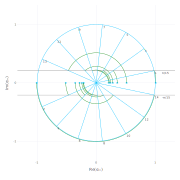

In [8]:
illustratepythagorean(15)

In [9]:
draw(SVG("pythagorean-16.svg", 13cm, 13cm), illustratepythagorean(16, 13cm, 13cm))
draw(SVG("pythagorean-17.svg", 13cm, 13cm), illustratepythagorean(17, 13cm, 13cm))

To build the matrix logarithm of cyclic permutations we start with a function to calculate coefficients

In [25]:
function pythagoreancoefficients{S<:Integer, T<:Real}(::Type{T}, n::S)
    if n < 2
        error("Arguments out of range")
    end
    u = Vector{Complex{T}}(n - 1)
    nT = convert(T, n)
    piT = convert(T, pi)
    oT = convert(T, 1)
    noT = convert(T, -1)
    zT = convert(T, 0)
    sT = noT
    aT = zT
    if n % 2 == 0
        for m = 1:(n - 1)
            sT *= noT
            aT += oT
            @inbounds u[m] = complex(sT * piT / (nT * tan(piT * (aT / nT))), sT * piT / nT)
        end
    else
        for m = 1:(n - 1)
            sT *= noT
            aT += oT
            @inbounds u[m] = complex(sT * piT / (nT * sin(piT * (aT / nT))), zT)
        end
    end
    return u
end
pythagoreancoefficients{S<:Integer}(n::S) = pythagoreancoefficients(Float64, n::S)

pythagoreancoefficients (generic function with 2 methods)

Another quick test of the new functions

In [26]:
[pythagoreancoefficients(9) logm(C)[1,2:end]']

8x2 Array{Complex{Float64},2}:
    1.0206+0.0im     1.0206-5.55112e-17im
  -0.54305+0.0im   -0.54305-6.10623e-16im
  0.403067+0.0im   0.403067+4.92661e-16im
 -0.354451+0.0im  -0.354451-1.38778e-16im
  0.354451+0.0im   0.354451-9.02056e-17im
 -0.403067+0.0im  -0.403067-3.88578e-16im
   0.54305+0.0im    0.54305+7.21645e-16im
   -1.0206+0.0im    -1.0206-7.77156e-16im

We can implement this in a function that will always return a dense complex matrix:

In [27]:
function logcyclicpermutation{S<:Integer, T<:Real}(::Type{T}, n::S, k::S)
    if n < 2 || k < 1
        throw(DomainError("Parameters out of range"))
    end
    A = cyclicpermutation(Complex{T}, n, k)
    B = zeros(A)
    C = eye(A)
    u = pythagoreancoefficients(T, n)
    for m = 1:(n - 1)
        C *= A
        @inbounds B += (C - I) * u[m]
    end
    return B
end
logcyclicpermutation{S<:Integer}(n::S, k::S) = logcyclicpermutation(Float64, n, k)

logcyclicpermutation (generic function with 2 methods)

Testing the function:

In [28]:
round(expm(logcyclicpermutation(9, 1)), 5)

9x9 Array{Complex{Float64},2}:
  0.0+0.0im   1.0+0.0im   0.0+0.0im  …   0.0+0.0im  -0.0+0.0im  -0.0+0.0im
 -0.0+0.0im   0.0+0.0im   1.0+0.0im     -0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im  -0.0+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im  -0.0+0.0im  -0.0+0.0im     -0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im  -0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im  -0.0+0.0im  -0.0+0.0im  …   1.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.0+0.0im      0.0+0.0im   1.0+0.0im   0.0+0.0im
  0.0+0.0im  -0.0+0.0im  -0.0+0.0im     -0.0+0.0im   0.0+0.0im   1.0+0.0im
  1.0+0.0im   0.0+0.0im   0.0+0.0im     -0.0+0.0im  -0.0+0.0im   0.0+0.0im